# US market analysis

## Import and cleaning data

### Import data ship price border

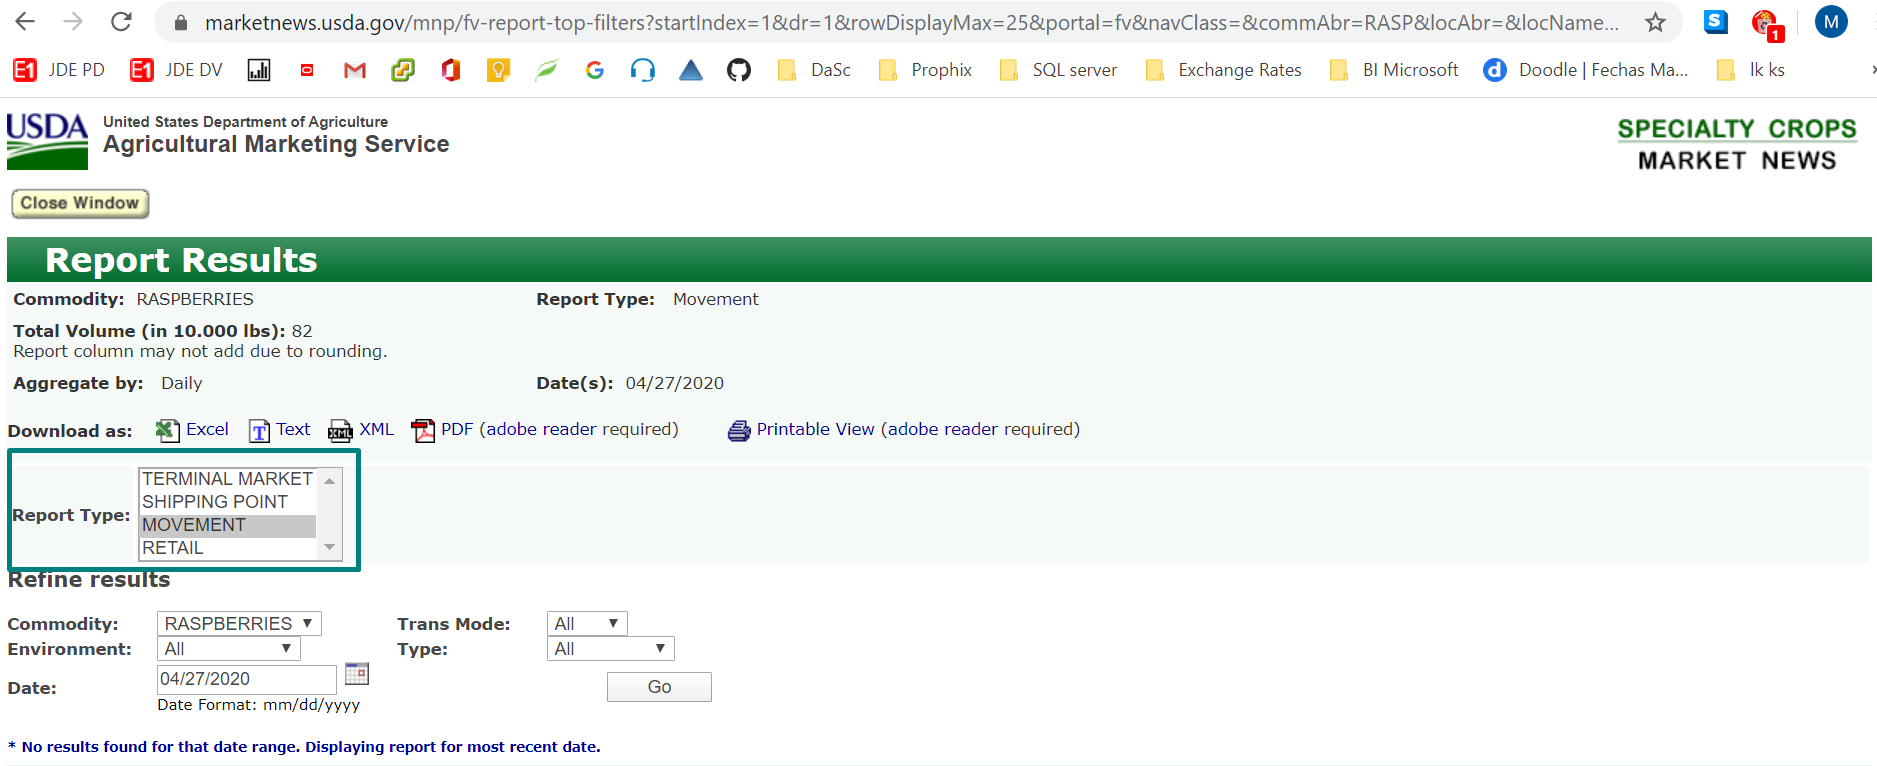

In [39]:
from IPython.display import Image
Image("Data/Website.png")

In [2]:
crop = 'RASPBERRIES'
crop_abb = 'RASP'
conv_package_un = 72 * 0.0283495
lb_to_kg = 0.453592 #0.0283495*72

In [3]:
# Importing libraries 
import pandas as pd 
from datetime import date

# Setting dates
# Date from
fday = '01'
fmonth = '01'
fyear = '2017'

# Date to : current date data to collect updated information
tday = date.today().strftime('%d')
tmonth = date.today().strftime('%m')
tyear = date.today().strftime('%Y')

# URL for accessing shipping point prices
USprices = f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters\
?&commAbr={crop_abb}&varName=&locAbr=&repType=shipPriceDaily\
&navType=byComm&locName=&navClass=&type=shipPrice&dr=1&volume=&commName={crop}&portal=fv&region=\
&navClassFRUITS=&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"

# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USprices,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = f'./Data/{crop}/USMXprices.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
prices = pd.DataFrame()
prices = pd.read_excel(file_path\
                    ,header=0
                    ,usecols= (['Commodity Name',\
                    'City Name',\
                    'Package',\
                    'Date',\
                    'Low Price',\
                    'High Price',\
                    'Mostly Low',\
                    'Mostly High',\
                    'Season']))

### Analyize data

In [4]:
import missingno as msno
msno.matrix(prices)

In [5]:
prices.groupby('City Name')['Date'].nunique()

City Name
MEXICO CROSSINGS THROUGH ARIZONA, CALIFORNIA AND TEXAS    584
SALINAS-WATSONVILLE CALIFORNIA                            379
Name: Date, dtype: int64

In [6]:
prices.groupby('Package')['Date'].nunique()

Package
flats 12 6-oz cups with lids    828
Name: Date, dtype: int64

In [7]:
prices.groupby('Commodity Name')['Date'].nunique()

Commodity Name
RASPBERRIES    828
Name: Date, dtype: int64

### Cleanance

<ul>
<li><input type="checkbox" disabled> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [8]:
prices = prices[(prices['City Name']=='MEXICO CROSSINGS THROUGH ARIZONA, CALIFORNIA AND TEXAS') \
       & (prices['Low Price'].notnull()) & (prices['High Price'].notnull())]

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [9]:
prices['Avg Price'] = prices[['Low Price','High Price']].mean(axis=1)

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [10]:
prices.drop(axis=1, columns=['Low Price','High Price','City Name','Package','Mostly Low','Mostly High','Commodity Name','Season'],inplace=True)

In [11]:
prices.set_index('Date',inplace=True)

In [12]:
prices_complete = prices.resample('D').fillna('nearest')

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

### Import data movement quantities

In [13]:
# URL for accessing quantities
USquantity =f"https://www.marketnews.usda.gov/mnp/fv-report-top-filters?\
&commAbr={crop_abb}&varName=&locAbr=&repType=movementDaily\
&navType=byComm&locName=&navClass=&navClass=&type=movement&dr=1\
&volume=&commName={crop}&portal=fv&region=\
&repDate={fmonth}%2F{fday}%2F{fyear}&endDate={tmonth}%2F{tday}%2F{tyear}&format=excel&rebuild=false"    


# Assign the table data in html format to a Pandas dataframe
table =  pd.read_html(USquantity,header=0,parse_dates=['Date'])[0]
  
# Store the dataframe in Excel file to avoid html tags and save data source file
file_path = f'./Data/{crop}/USMXquantity.xls'
table.to_excel(file_path) 

# Read the Excel in a Pandas dataframe
quantity = pd.DataFrame()
quantity = pd.read_excel(file_path\
                    ,header=0)

### Analyize data

In [14]:
quantity.head()

,Unnamed: 0,Commodity Name,Origin Name,Type,Package,Variety,Date,District,10000lb units,Trans Mode,Package Count,Car/Van Count,Season,Environment,Import/Export,Adjustments
0,0,RASPBERRIES,CALIFORNIA-CENTRAL,NaN,FLATS 12 6-OZ CUPS WITH LIDS,NaN,2017-01-07,SANTA MARIA,2,Truck,3294.0,NaN,2017,NaN,NaN,week ending amount
1,1,RASPBERRIES,CALIFORNIA-CENTRAL,NaN,FLATS 12 6-OZ CUPS WITH LIDS,NaN,2017-02-04,SANTA MARIA,0,Truck,956.0,NaN,2017,NaN,NaN,week ending amount
2,2,RASPBERRIES,CALIFORNIA-CENTRAL,NaN,FLATS 12 6-OZ CUPS WITH LIDS,NaN,2017-02-11,SANTA MARIA,0,Truck,956.0,NaN,2017,NaN,NaN,week ending amount
3,3,RASPBERRIES,CALIFORNIA-CENTRAL,NaN,FLATS 12 6-OZ CUPS WITH LIDS,NaN,2017-02-18,SANTA MARIA,0,Truck,482.0,NaN,2017,NaN,NaN,week ending amount
4,4,RASPBERRIES,CALIFORNIA-CENTRAL,NaN,FLATS 12 6-OZ CUPS WITH LIDS,NaN,2017-02-25,SANTA MARIA,0,Truck,604.0,NaN,2017,NaN,NaN,week ending amount


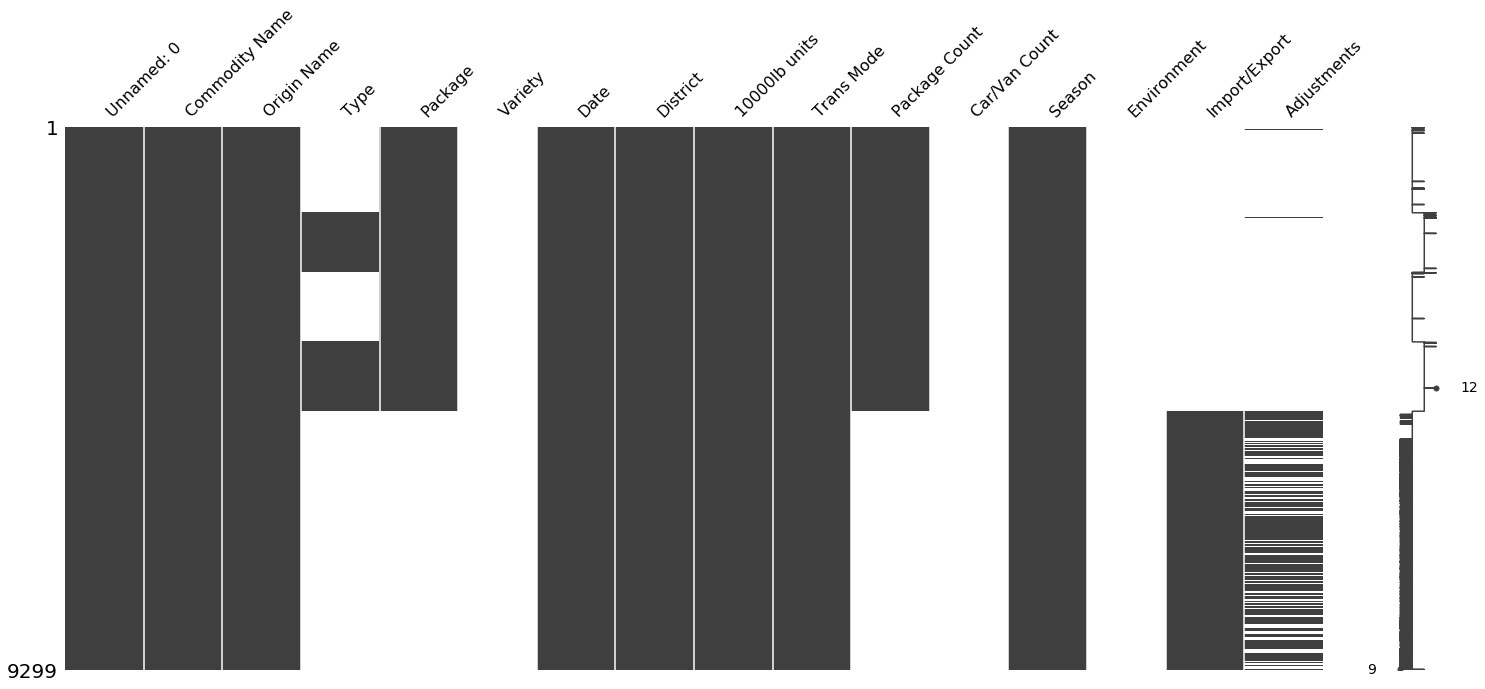

In [15]:
import missingno as msno
msno.matrix(quantity)

In [16]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9299 entries, 0 to 9298
Data columns (total 16 columns):
Unnamed: 0        9299 non-null int64
Commodity Name    9299 non-null object
Origin Name       9299 non-null object
Type              2202 non-null object
Package           4868 non-null object
Variety           0 non-null float64
Date              9299 non-null datetime64[ns]
District          9299 non-null object
10000lb units     9299 non-null int64
Trans Mode        9299 non-null object
Package Count     4868 non-null float64
Car/Van Count     0 non-null float64
Season            9299 non-null int64
Environment       3 non-null object
Import/Export     4433 non-null object
Adjustments       3233 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 1.1+ MB


In [17]:
quantity.groupby('Origin Name')['Date'].nunique()

Origin Name
CALIFORNIA-CENTRAL     821
CALIFORNIA-SOUTH      1188
CANADA                  10
CHILE                   26
GUATEMALA              423
MEXICO                1205
NETHERLANDS             19
Name: Date, dtype: int64

In [18]:
quantity = quantity[(quantity['Origin Name']=='MEXICO') \
       & (quantity['10000lb units'].notnull())]

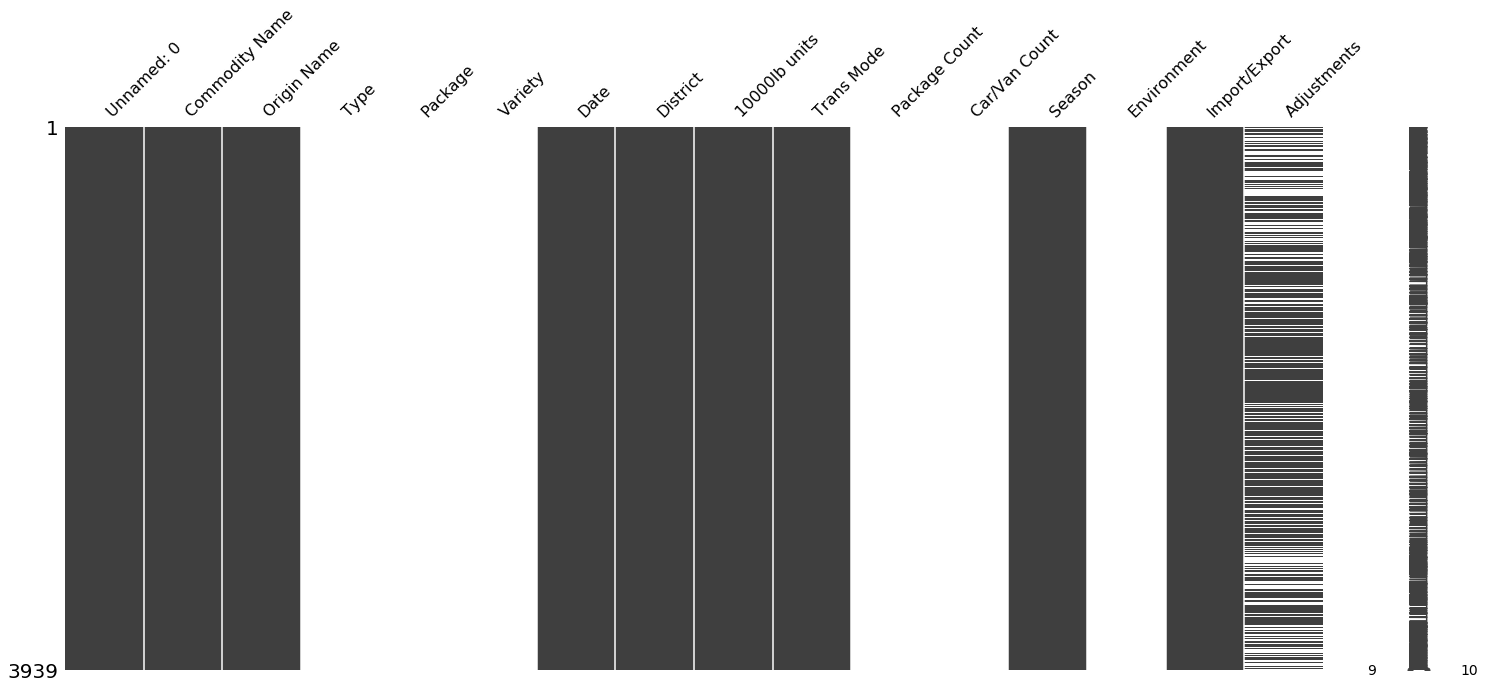

In [19]:
import missingno as msno
msno.matrix(quantity)

In [20]:
quantity['10000lb units'].sum()

45401

In [21]:
quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 5340 to 9278
Data columns (total 16 columns):
Unnamed: 0        3939 non-null int64
Commodity Name    3939 non-null object
Origin Name       3939 non-null object
Type              0 non-null object
Package           0 non-null object
Variety           0 non-null float64
Date              3939 non-null datetime64[ns]
District          3939 non-null object
10000lb units     3939 non-null int64
Trans Mode        3939 non-null object
Package Count     0 non-null float64
Car/Van Count     0 non-null float64
Season            3939 non-null int64
Environment       0 non-null object
Import/Export     3939 non-null object
Adjustments       2712 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 523.1+ KB


### Cleanance

In [22]:
quantity_complete = quantity.groupby(['Date'])['10000lb units'].agg('sum').reset_index()

In [23]:
quantity_complete.set_index('Date',inplace=True)

In [24]:
quantity_complete.head()

,10000lb units
Date,
2017-01-02,68
2017-01-03,97
2017-01-04,59
2017-01-05,60
2017-01-06,45


In [25]:
quantity_complete.shape

(1205, 1)

### Join prices and quantities

In [26]:
prices_complete.shape

(1212, 1)

In [27]:
df = prices_complete.join(quantity_complete)

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [28]:
df = df.fillna(0)

In [29]:
df['Kg'] = df['10000lb units']*lb_to_kg*10000

In [30]:
df['USDKg'] = df['Avg Price']/conv_package_un

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled checked> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled> Add price*quantity to value imports</li>
</ul>

In [31]:
df ['USD'] = df['Kg'] * df['USDKg'] 

<ul>
<li><input type="checkbox" disabled checked> Keep only imports from Mexico
<li><input type="checkbox" disabled checked> Unified prices, 'Mostly' average or 'Price' average instead</li>
<li><input type="checkbox" disabled checked> Add empty days with nearest available price</li>
<li><input type="checkbox" disabled checked> Summarize/Delete duplicates</li>
<li><input type="checkbox" disabled checked> Join import quantities data, summarized by day and apply zero if there is no data</li>
<li><input type="checkbox" disabled checked> Convert quantities to Kg and prices to USD-Kg</li>
<li><input type="checkbox" disabled checked> Add price*quantity to value imports</li>
</ul>

In [32]:
df.to_excel(f'./Results/{crop}/resultpricesquantity.xlsx')

In [33]:
prices.to_excel(f'./Results/{crop}/prices.xlsx')

### Plotting

In [34]:
prices['Avg Price Kg'] = prices['Avg Price']/(conv_package_un)
quantity_complete['Kg'] = quantity_complete['10000lb units']*lb_to_kg*10000
quantity_complete['Tn'] = quantity_complete['10000lb units']*lb_to_kg*10

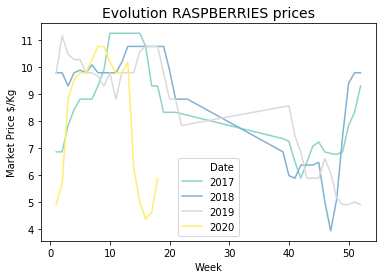

In [35]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

plot_prices = prices.resample('W').mean()
ax = sns.lineplot(x = plot_prices.index.week,
                  y = plot_prices['Avg Price Kg'],
                  hue = plot_prices.index.year,
                  data = plot_prices, palette = "Set3")
plt.title(f'Evolution {crop} prices', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Price $/Kg', fontsize=10)
plt.savefig(f'./Results/{crop}/Evolution_{crop}_US.png')
plot_prices['Week_Num']=plot_prices.index.week
plot_prices.groupby('Week_Num').agg('count')
plt.show()

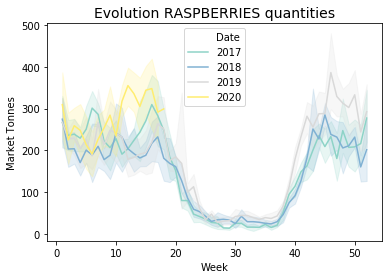

In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
import datetime

ax = sns.lineplot(x = quantity_complete.index.week,
                  y = quantity_complete['Tn'],
                  hue = quantity_complete.index.year,
                  data = quantity_complete, palette = "Set3")
plt.title(f'Evolution {crop} quantities', fontsize=14)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Market Tonnes', fontsize=10)
plt.savefig(f'./Results/{crop}/Evolution_{crop}_US_Kg.png')
quantity_complete['Week_Num']=quantity_complete.index.week
quantity_complete.groupby('Week_Num').agg('count')
plt.show()

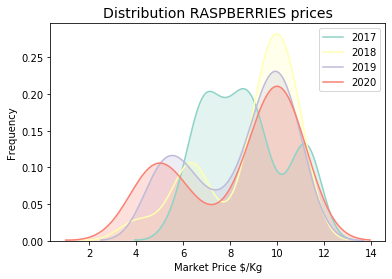

In [37]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plot_prices_na = plot_prices.fillna(-1)

with sns.color_palette("Set3",10):
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2018',before='2017'),label='2017', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2019',before='2018'),label='2018', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2020',before='2019'),label='2019', shade=True)
    ax = sns.kdeplot(prices['Avg Price Kg'].truncate(after='2021',before='2020'),label='2020', shade=True)
    plt.title(f'Distribution {crop} prices', fontsize=14)
    plt.xlabel('Market Price $/Kg', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.savefig(f'./Results/{crop}/Distribution_{crop}_US.png')
    plt.show()

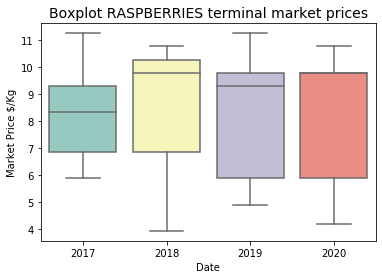

In [38]:
ax = sns.boxplot(x=prices.index.year,
                 y=prices['Avg Price Kg'],
                 data=prices, palette="Set3")
plt.title(f'Boxplot {crop} terminal market prices', fontsize=14)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Market Price $/Kg', fontsize=10)
plt.savefig(f'./Results/{crop}/Boxplot_{crop}_US.png')
plt.show()

In [39]:
quantity_complete['Tn'].groupby(quantity_complete.index.year).sum()

Date
2017    56417.77296
2018    52530.48952
2019    64400.99216
2020    32586.04928
Name: Tn, dtype: float64

In [42]:
prices['Avg Price Kg'].groupby(prices.index.year).describe().transpose().to_excel(f'./Results/{crop}/summary.xlsx')

In [126]:
prices_w = prices.resample('W').mean()
prices_w['Week'] = prices_w.index.week
prices_w['Year'] = prices_w.index.year
prices_w[prices_w['Week'] == prices_w.tail(1)['Week'][0]-1][['Avg Price Kg','Week','Year']]\
.to_excel(f'./Results/{crop}/last_price.xlsx')